In [3]:
import tensorflow
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.utils import np_utils

In [4]:
x = pd.read_csv("/home/yash/Desktop/Python/Data_Sets/MNIST/train.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print (X.shape,y.shape)

(42000, 784) (42000,)


In [5]:
# to convert labels to one hot
y = np_utils.to_categorical(y)
y.shape

(42000, 10)

In [6]:
y[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
X_train = X[:8000,:]
Y_train = y[:8000,:]
X_val = X[8000:,:]
Y_val = y[8000:,:]

print (X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

(8000, 784) (8000, 10) (34000, 784) (34000, 10)


In [8]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
hist = model.fit(X_train,Y_train,batch_size=256,epochs=75,verbose=2,validation_data=(X_val,Y_val))

Train on 8000 samples, validate on 34000 samples
Epoch 1/75
 - 2s - loss: 2.2719 - acc: 0.1557 - val_loss: 2.1542 - val_acc: 0.3128
Epoch 2/75
 - 1s - loss: 2.0598 - acc: 0.4341 - val_loss: 1.9648 - val_acc: 0.5256
Epoch 3/75
 - 1s - loss: 1.8639 - acc: 0.5921 - val_loss: 1.7692 - val_acc: 0.6288
Epoch 4/75
 - 1s - loss: 1.6619 - acc: 0.6749 - val_loss: 1.5707 - val_acc: 0.6855
Epoch 5/75
 - 1s - loss: 1.4644 - acc: 0.7134 - val_loss: 1.3831 - val_acc: 0.7181
Epoch 6/75
 - 1s - loss: 1.2828 - acc: 0.7424 - val_loss: 1.2156 - val_acc: 0.7450
Epoch 7/75
 - 1s - loss: 1.1261 - acc: 0.7701 - val_loss: 1.0755 - val_acc: 0.7651
Epoch 8/75
 - 1s - loss: 0.9976 - acc: 0.7911 - val_loss: 0.9625 - val_acc: 0.7919
Epoch 9/75
 - 1s - loss: 0.8953 - acc: 0.8114 - val_loss: 0.8713 - val_acc: 0.8056
Epoch 10/75
 - 1s - loss: 0.8134 - acc: 0.8215 - val_loss: 0.7999 - val_acc: 0.8143
Epoch 11/75
 - 1s - loss: 0.7489 - acc: 0.8327 - val_loss: 0.7422 - val_acc: 0.8229
Epoch 12/75
 - 1s - loss: 0.6961 - a

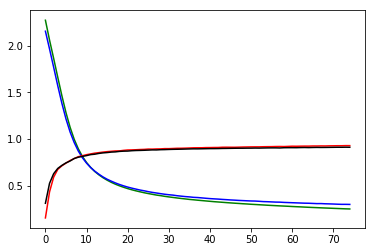

In [11]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()